<a href="https://colab.research.google.com/github/CuadraAlconero/IDAL_IA3_CuadraAlconero/blob/main/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

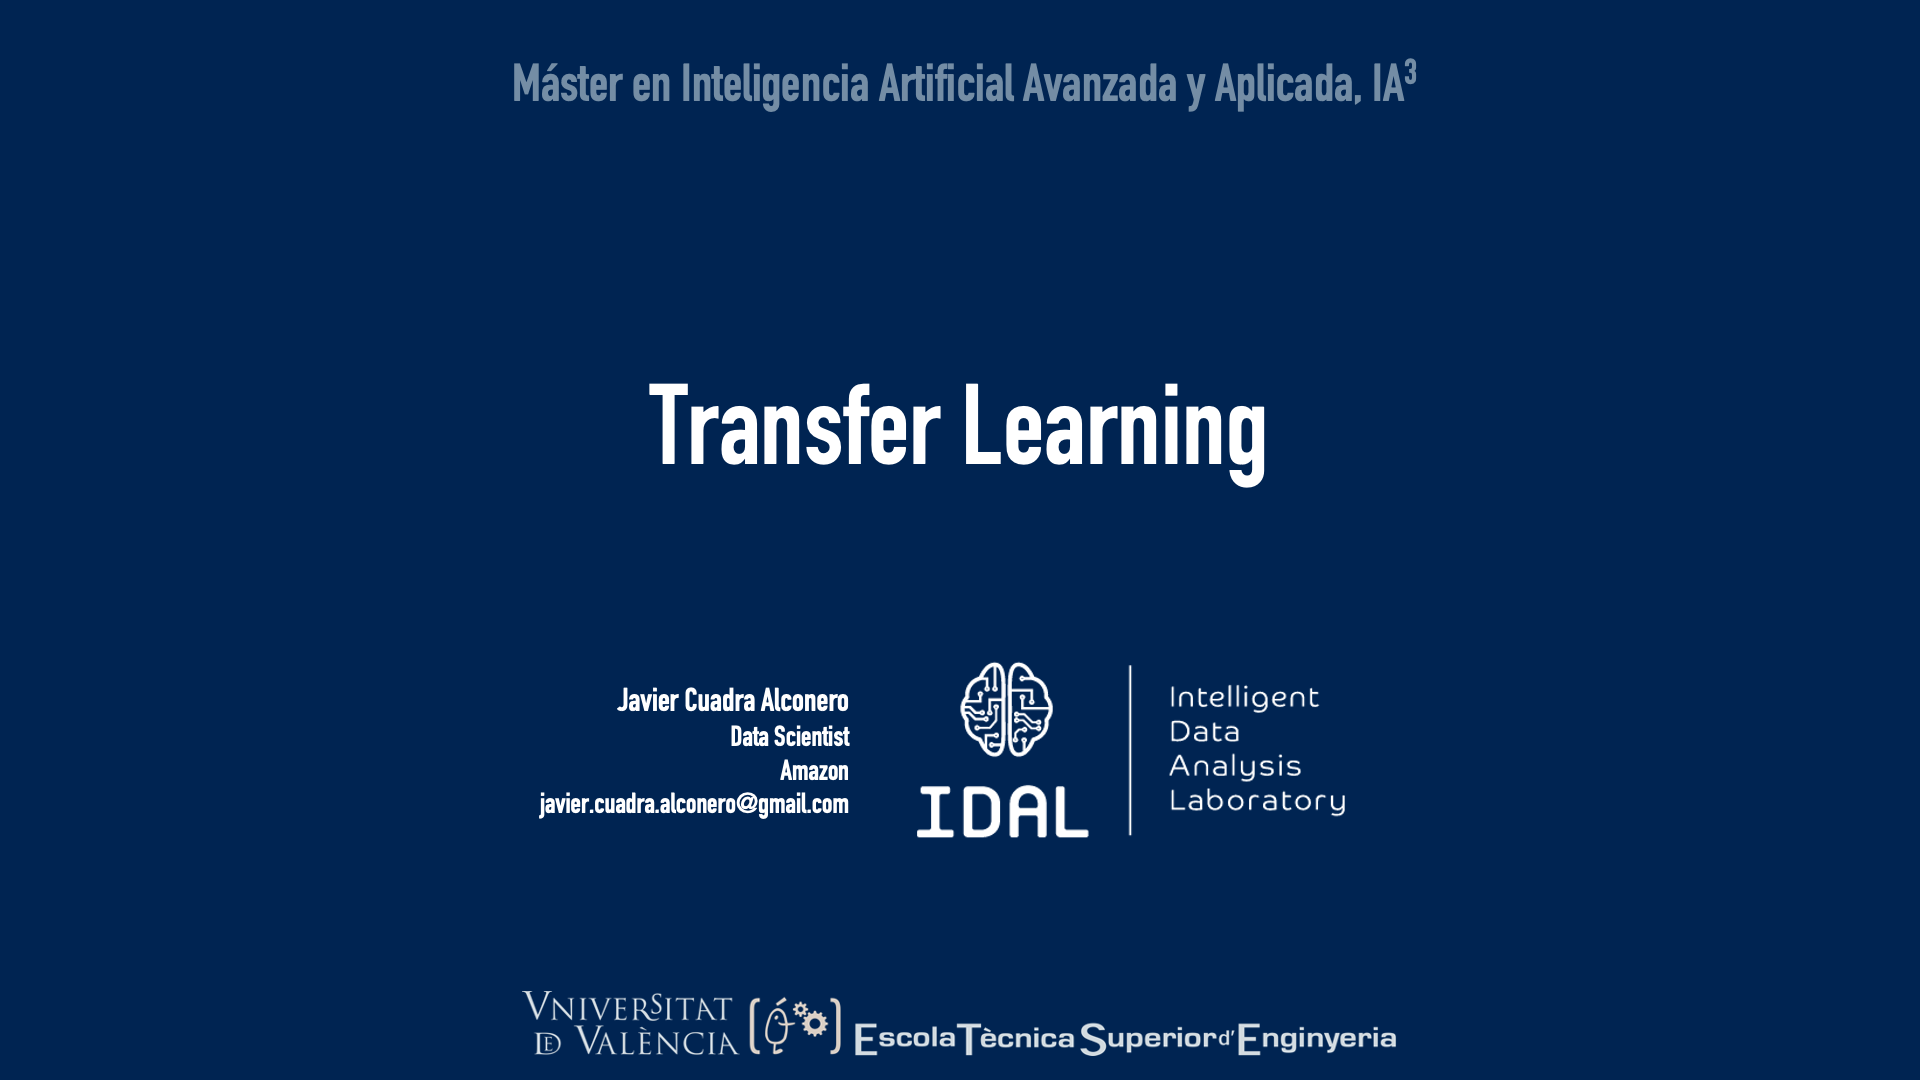

# Introducción a Transfer Learning

Transfer learning hace referencia a un conjunto de técnicas en aprendizaje máquina en las que se utiliza el "conocimiento" obtenido por un modelo para resolver una tarea concreta como punto de partida para un entrenamiento con el objetivo de resolver una tarea similar.

Este tipo de técnicas toma especial importancia en dominios como el procesado del lenguaje natural (NLP) y la visión por computador (Computer Vision) donde los modelos desarrollados son especialmente pesados y han sido entrenados sobre enormes conjuntos de datos.

El mundo del transfer learning es amplio y vasto, se trata de una técnica ampliamente usada en la industria por las ventajas que aporta a la hora de generar un nuevo producto, el cual, sin un modelo preentrenado, tendría unos costes en tiempo y recursos mucho mayores.

En este notebook vamos a aprender dos técnicas diferentes de transfer learning:

- Feature Extraction
- Fine Tuning

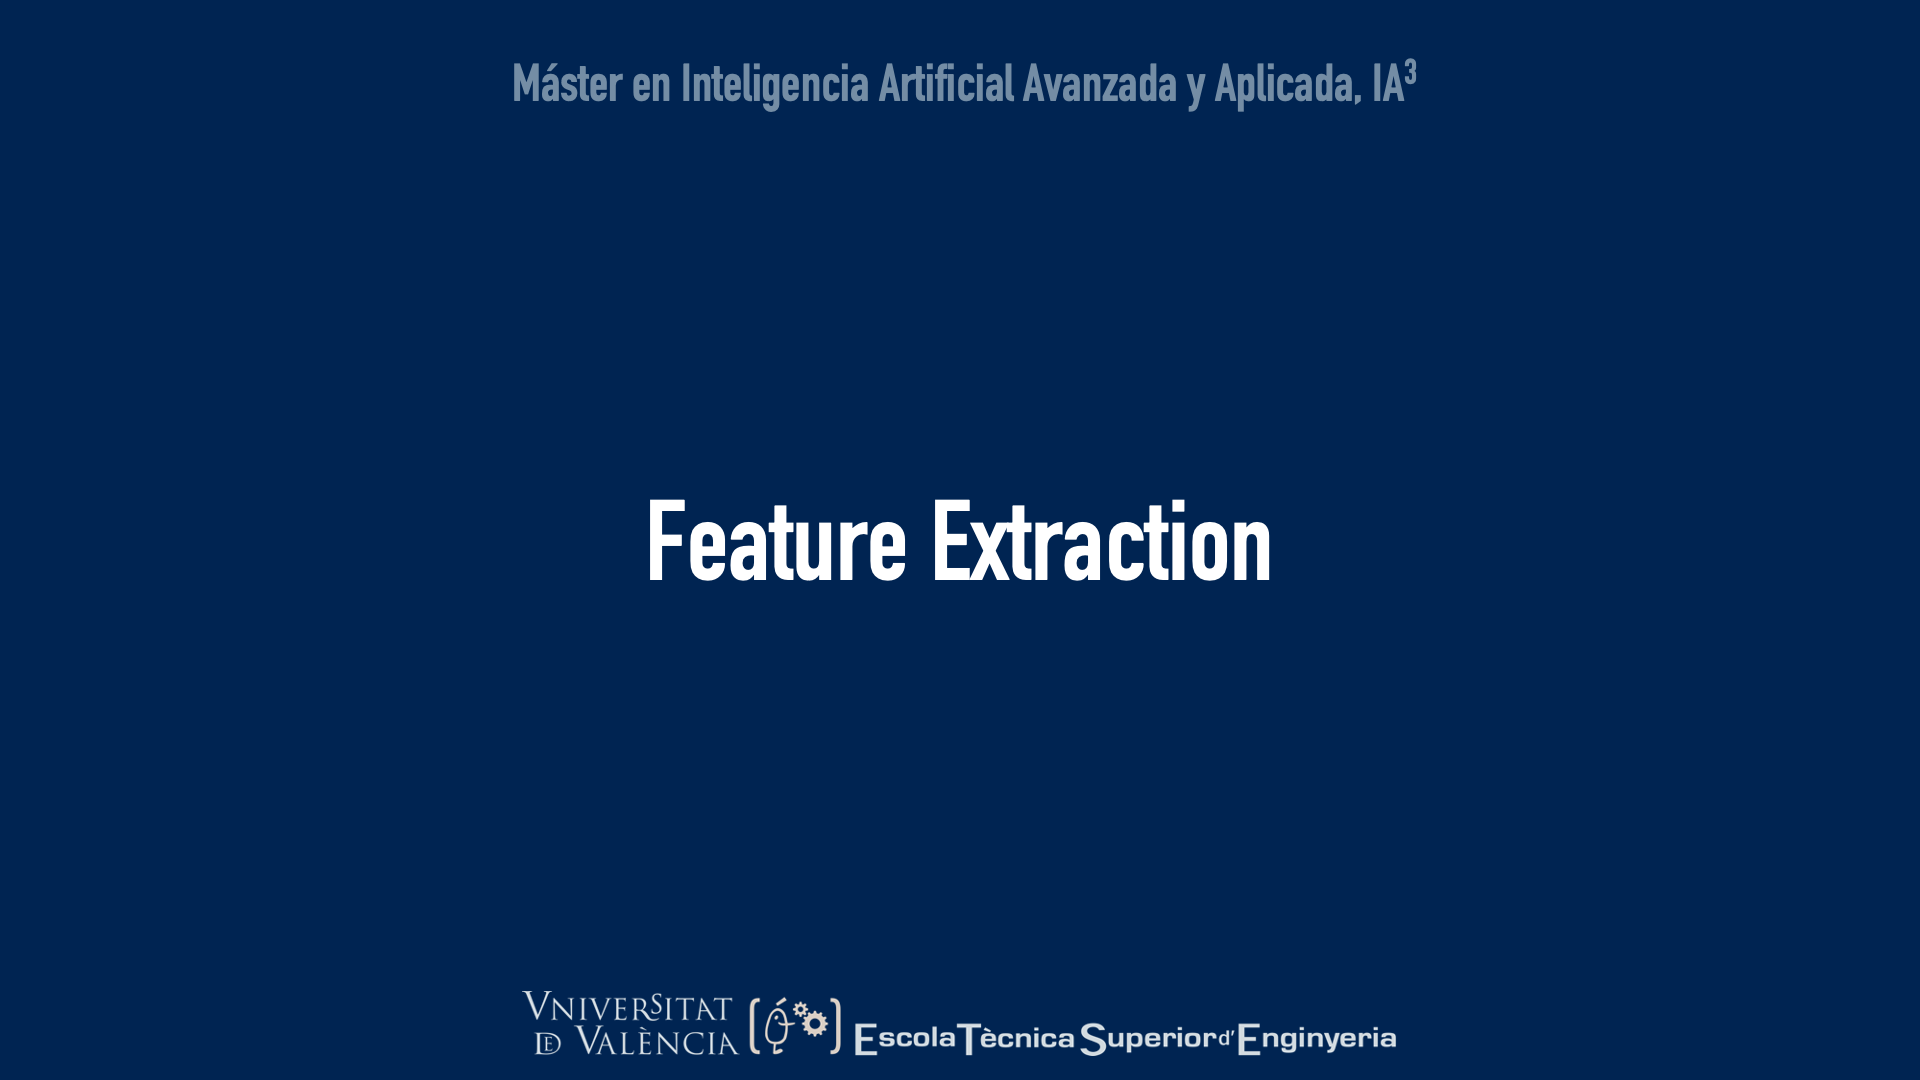

El modelo de feature extraction en transfer learning se basa en utilizar un modelo previamente entrenado para obtener nuevas características que servirán de entrada para entrenar un nuevo modelo.

Visualicemos una red de neuronas y las salidas de cada una de sus capas:

<center>

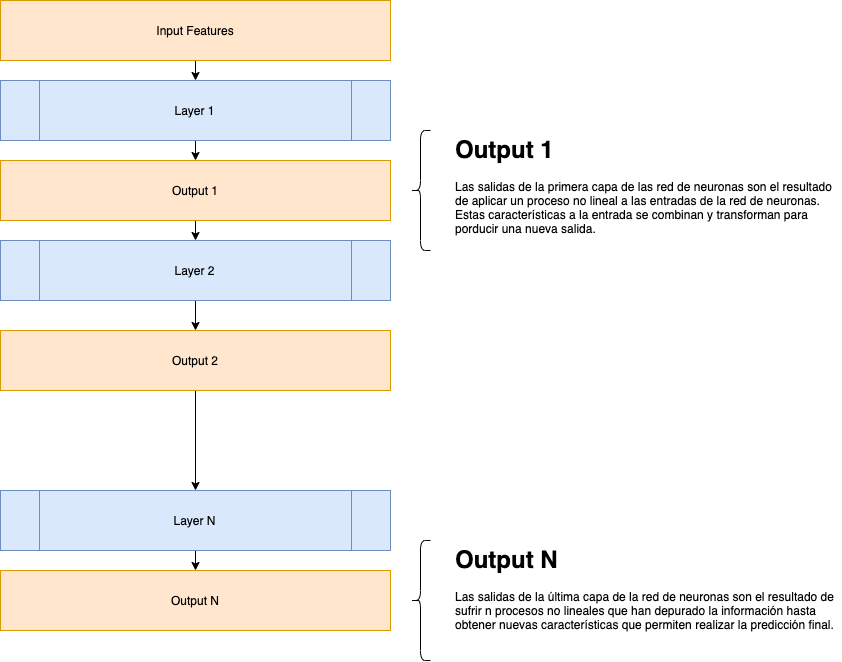

</center>

La idea del proceso de feature extraction es utilizar las salidas producidas en una de las capas de una red de neuronas como entrada para un nuevo modelo. Esta aproximación se basa justamente en las capacidades de una red de neuronas para generar información de mayor calidad tras atravesar sus diferentes capas.

Vamos a realizar algunos ejemplos utilizando la librería Keras para generar recursos con los que construir nuestros modelos utilizando transfer learning.

# Ejemplo 01

Construyamos un modelo de clasificación para el dataset Iris, guardemos el modelo e importémoslo de nuevo.

In [48]:
import seaborn as sns
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
import pandas as pd

In [26]:
iris = sns.load_dataset("iris")
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [49]:
X=iris.iloc[:,:4]
Y=pd.get_dummies(iris.iloc[:,-1])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [50]:
input = keras.Input(X.shape[1],)
layer_1 = keras.layers.Dense(3, activation="relu")(input)
layer_2 = keras.layers.Dense(3, activation="relu")(layer_1)
output = keras.layers.Dense(3, activation="softmax")(layer_2)
model = keras.Model(inputs=input, outputs=output, name="Iris_classifier")
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.CategoricalCrossentropy())

In [51]:
model.summary()

Model: "Iris_classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 4)]               0         
_________________________________________________________________
dense_36 (Dense)             (None, 3)                 15        
_________________________________________________________________
dense_37 (Dense)             (None, 3)                 12        
_________________________________________________________________
dense_38 (Dense)             (None, 3)                 12        
Total params: 39
Trainable params: 39
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
4/4 [==============================] - 0s 2ms/step - loss: 1.0969
Epoch 2/10
4/4 [==============================] - 0s 1ms/step - loss: 1.0966
Epoch 3/10
4/4 [==============================] - 0s 2ms/step - loss: 1.0962
Epoch 4/10
4/4 [==============================] - 0s 1ms/step - loss: 1.0960
Epoch 5/10
4/4 [==============================] - 0s 1ms/step - loss: 1.0959
Epoch 6/10
4/4 [==============================] - 0s 1ms/step - loss: 1.0957
Epoch 7/10
4/4 [==============================] - 0s 1ms/step - loss: 1.0956
Epoch 8/10
4/4 [==============================] - 0s 1ms/step - loss: 1.0954
Epoch 9/10
4/4 [==============================] - 0s 1ms/step - loss: 1.0952
Epoch 10/10
4/4 [==============================] - 0s 2ms/step - loss: 1.0951


In [53]:
model.save("iris_1")

INFO:tensorflow:Assets written to: iris_1/assets


In [54]:
loaded_model = keras.models.load_model("iris_1")

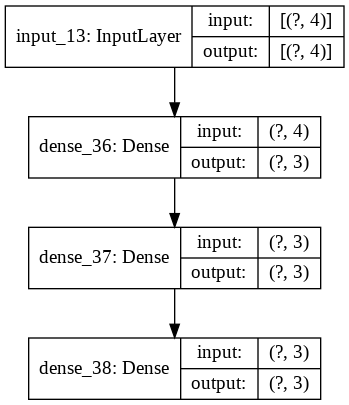

In [55]:
keras.utils.plot_model(loaded_model, show_shapes=True)

In [56]:
loaded_model.fit(X, Y, validation_split=0.2, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 28ms/step - loss: 1.0784 - val_loss: 1.1876
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0758 - val_loss: 1.1984
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0733 - val_loss: 1.2096
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0710 - val_loss: 1.2220
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0683 - val_loss: 1.2343
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 1.0661 - val_loss: 1.2468
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0635 - val_loss: 1.2593
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 1.0610 - val_loss: 1.2724
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0588 - val_loss: 1.2853
Epoch 10/100
4/4 [==============================] - 0s 5ms/step - loss: 1.0566 - val_loss: 1.2988
Epoch 11/100
4/4 [==========

# Ejemplo 02

Extraer características de las diferentes capas del modelo previamente entrenado.